In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('severity_data.csv')

In [3]:
data.head()

,Policynumber,ADDDVREBCTEXT1_accountancy,ADDDVREBCTEXT1_acousticengineer,ADDDVREBCTEXT1_addressingcircularisingservices,ADDDVREBCTEXT1_advertising,ADDDVREBCTEXT1_aerialerector,ADDDVREBCTEXT1_aerialmanufacturer,ADDDVREBCTEXT1_aerialphotography,ADDDVREBCTEXT1_aerialsupplier,ADDDVREBCTEXT1_aerospaceindustry,...,RADIUSLIMIT,Total_Incurred,CONFINE1_1,CONFINE1_2,CONFINE1_3,CONFINE1_4,CONFINE2_1,CONFINE2_2,CONFINE2_3,CONFINE2_4
0,ANCV0004918,0,0,0,0,0,0,0,0,0,...,100.0,83.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ANCV0005313,0,0,0,0,0,0,0,0,0,...,100.0,92.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ANCV0005318,0,0,0,0,0,0,0,0,0,...,100.0,103.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ANCV0005379,0,0,0,0,0,0,0,0,0,...,100.0,95.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ANCV0005408,0,0,0,0,0,0,0,0,0,...,100.0,4597.06,65.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = data.drop(['Policynumber'], axis = 1)

In [5]:
data.shape

(6830, 14610)

In [6]:
y = np.array(data.Total_Incurred)
X = np.array(data.drop(['Total_Incurred'], axis = 1))
print (X.shape)
print (y.shape)

(6830, 14609)
(6830,)


In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4781, 14609) (2049, 14609) (4781,) (2049,)


In [9]:
import time 
import xgboost as xgb

In [21]:
from sklearn.model_selection import GridSearchCV

In [34]:
cv_params = {'reg_alpha':[1e-2, 0.1, 1, 10], 'reg_lambda':[1e-2, 0.1, 1, 10]} 

other_params = {'learning_rate': 0.05, 'n_estimators': 80, 'max_depth': 9, 'min_child_weight': 5, 'seed': 0,
                'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha':.0.01, 'reg_lambda': 10}

In [35]:
start = time.time()

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'r2', cv = 3, verbose = 1, n_jobs = 1)
optimized_GBM.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], early_stopping_rounds = 20, eval_metric = 'rmse')
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[0]	validation_0-rmse:16303.3	validation_1-rmse:6870.37
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:16249.9	validation_1-rmse:6766.07
[2]	validation_0-rmse:16189.4	validation_1-rmse:6665.71
[3]	validation_0-rmse:16138.1	validation_1-rmse:6567.79
[4]	validation_0-rmse:16083.9	validation_1-rmse:6481.83
[5]	validation_0-rmse:16042.7	validation_1-rmse:6404.69
[6]	validation_0-rmse:16002.7	validation_1-rmse:6328.43
[7]	validation_0-rmse:15957	validation_1-rmse:6258.12
[8]	validation_0-rmse:15921.7	validation_1-rmse:6199.5
[9]	validation_0-rmse:15886.3	validation_1-rmse:6149.02
[10]	validation_0-rmse:15854.4	validation_1-rmse:6104.85
[11]	validation_0-rmse:15832.2	validation_1-rmse:6064.42
[12]	validation_0-rmse:15802.4	validation_1-rmse:6026.3
[13]	validation_0-rmse:15774.3	validation_1-rmse:5989

[26]	validation_0-rmse:14079.9	validation_1-rmse:6155.55
[27]	validation_0-rmse:14030.1	validation_1-rmse:6181.29
[28]	validation_0-rmse:14025.1	validation_1-rmse:6170.85
[29]	validation_0-rmse:14024.9	validation_1-rmse:6138.58
[30]	validation_0-rmse:14023.2	validation_1-rmse:6120.22
[31]	validation_0-rmse:13949.9	validation_1-rmse:6243.82
[32]	validation_0-rmse:13879.2	validation_1-rmse:6293.15
[33]	validation_0-rmse:13823.2	validation_1-rmse:6444.74
[34]	validation_0-rmse:13747.7	validation_1-rmse:6461.81
[35]	validation_0-rmse:13674.5	validation_1-rmse:6467.94
[36]	validation_0-rmse:13675.3	validation_1-rmse:6455.73
[37]	validation_0-rmse:13606.8	validation_1-rmse:6512.2
[38]	validation_0-rmse:13512.1	validation_1-rmse:6505.56
[39]	validation_0-rmse:13512.7	validation_1-rmse:6501.27
[40]	validation_0-rmse:13453.3	validation_1-rmse:6553.36
[41]	validation_0-rmse:13455.6	validation_1-rmse:6540.16
[42]	validation_0-rmse:13415.9	validation_1-rmse:6554.78
[43]	validation_0-rmse:13342.3	v

[1]	validation_0-rmse:16005.6	validation_1-rmse:6769.42
[2]	validation_0-rmse:15828.4	validation_1-rmse:6688.01
[3]	validation_0-rmse:15657.2	validation_1-rmse:6610.04
[4]	validation_0-rmse:15609.5	validation_1-rmse:6520.29
[5]	validation_0-rmse:15452.7	validation_1-rmse:6475.02
[6]	validation_0-rmse:15352.1	validation_1-rmse:6435.09
[7]	validation_0-rmse:15325.5	validation_1-rmse:6369.78
[8]	validation_0-rmse:15300.9	validation_1-rmse:6310.31
[9]	validation_0-rmse:15169.9	validation_1-rmse:6333.4
[10]	validation_0-rmse:15038.2	validation_1-rmse:6309.29
[11]	validation_0-rmse:14900.1	validation_1-rmse:6272.44
[12]	validation_0-rmse:14881.7	validation_1-rmse:6231.72
[13]	validation_0-rmse:14755.7	validation_1-rmse:6219.91
[14]	validation_0-rmse:14643.6	validation_1-rmse:6225.35
[15]	validation_0-rmse:14631.7	validation_1-rmse:6198.92
[16]	validation_0-rmse:14617.3	validation_1-rmse:6171.21
[17]	validation_0-rmse:14534.9	validation_1-rmse:6152.69
[18]	validation_0-rmse:14524.2	validation

[8]	validation_0-rmse:15322.7	validation_1-rmse:6277.1
[9]	validation_0-rmse:15217.2	validation_1-rmse:6251.2
[10]	validation_0-rmse:15193	validation_1-rmse:6202.49
[11]	validation_0-rmse:15088.2	validation_1-rmse:6239.55
[12]	validation_0-rmse:15065.9	validation_1-rmse:6187.92
[13]	validation_0-rmse:14959.1	validation_1-rmse:6211.89
[14]	validation_0-rmse:14850	validation_1-rmse:6195
[15]	validation_0-rmse:14841	validation_1-rmse:6155.93
[16]	validation_0-rmse:14831.9	validation_1-rmse:6117.31
[17]	validation_0-rmse:14761.1	validation_1-rmse:6160.79
[18]	validation_0-rmse:14750	validation_1-rmse:6120.68
[19]	validation_0-rmse:14649	validation_1-rmse:6113.92
[20]	validation_0-rmse:14642.2	validation_1-rmse:6088.13
[21]	validation_0-rmse:14552.6	validation_1-rmse:6090.11
[22]	validation_0-rmse:14461.9	validation_1-rmse:6105.51
[23]	validation_0-rmse:14381.7	validation_1-rmse:6176.38
[24]	validation_0-rmse:14368.4	validation_1-rmse:6165.55
[25]	validation_0-rmse:14363	validation_1-rmse:6

[53]	validation_0-rmse:15494.2	validation_1-rmse:5633.39
[54]	validation_0-rmse:15491.8	validation_1-rmse:5632.45
[55]	validation_0-rmse:15485.9	validation_1-rmse:5628.63
[56]	validation_0-rmse:15480.9	validation_1-rmse:5626.51
[57]	validation_0-rmse:15478.1	validation_1-rmse:5624.3
[58]	validation_0-rmse:15474.1	validation_1-rmse:5624.41
[59]	validation_0-rmse:15469.5	validation_1-rmse:5623.44
[60]	validation_0-rmse:15465.8	validation_1-rmse:5624.82
[61]	validation_0-rmse:15462.4	validation_1-rmse:5624.2
[62]	validation_0-rmse:15456.6	validation_1-rmse:5624.36
[63]	validation_0-rmse:15453.9	validation_1-rmse:5622.77
[64]	validation_0-rmse:15449.8	validation_1-rmse:5625.51
[65]	validation_0-rmse:15446.7	validation_1-rmse:5626.17
[66]	validation_0-rmse:15443.4	validation_1-rmse:5625.85
[67]	validation_0-rmse:15438.7	validation_1-rmse:5624.11
[68]	validation_0-rmse:15436.9	validation_1-rmse:5625.42
[69]	validation_0-rmse:15433.5	validation_1-rmse:5625.75
[70]	validation_0-rmse:15430.9	va

[5]	validation_0-rmse:16042.7	validation_1-rmse:6404.69
[6]	validation_0-rmse:16002.7	validation_1-rmse:6328.43
[7]	validation_0-rmse:15957	validation_1-rmse:6258.12
[8]	validation_0-rmse:15921.7	validation_1-rmse:6199.5
[9]	validation_0-rmse:15886.3	validation_1-rmse:6149.02
[10]	validation_0-rmse:15854.4	validation_1-rmse:6104.85
[11]	validation_0-rmse:15832.2	validation_1-rmse:6064.42
[12]	validation_0-rmse:15802.4	validation_1-rmse:6026.3
[13]	validation_0-rmse:15774.3	validation_1-rmse:5989.06
[14]	validation_0-rmse:15751.2	validation_1-rmse:5958.72
[15]	validation_0-rmse:15732.8	validation_1-rmse:5926.44
[16]	validation_0-rmse:15717.2	validation_1-rmse:5899.67
[17]	validation_0-rmse:15697.5	validation_1-rmse:5872.61
[18]	validation_0-rmse:15680.7	validation_1-rmse:5850.74
[19]	validation_0-rmse:15663.8	validation_1-rmse:5833.46
[20]	validation_0-rmse:15649.9	validation_1-rmse:5810.16
[21]	validation_0-rmse:15635	validation_1-rmse:5796.76
[22]	validation_0-rmse:15624.3	validation_

[35]	validation_0-rmse:13674.5	validation_1-rmse:6467.94
[36]	validation_0-rmse:13675.3	validation_1-rmse:6455.73
[37]	validation_0-rmse:13606.8	validation_1-rmse:6512.2
[38]	validation_0-rmse:13512.1	validation_1-rmse:6505.56
[39]	validation_0-rmse:13512.7	validation_1-rmse:6501.27
[40]	validation_0-rmse:13453.3	validation_1-rmse:6553.36
[41]	validation_0-rmse:13455.6	validation_1-rmse:6540.16
[42]	validation_0-rmse:13415.9	validation_1-rmse:6554.78
[43]	validation_0-rmse:13342.3	validation_1-rmse:6578.61
[44]	validation_0-rmse:13288.3	validation_1-rmse:6601.35
[45]	validation_0-rmse:13289.2	validation_1-rmse:6598.55
[46]	validation_0-rmse:13252.9	validation_1-rmse:6758.57
[47]	validation_0-rmse:13210.2	validation_1-rmse:6797.34
[48]	validation_0-rmse:13153.9	validation_1-rmse:6834.65
[49]	validation_0-rmse:13102.9	validation_1-rmse:6859.76
[50]	validation_0-rmse:13071.6	validation_1-rmse:6885.2
Stopping. Best iteration:
[30]	validation_0-rmse:14023.2	validation_1-rmse:6120.22

[0]	va

[10]	validation_0-rmse:15038.2	validation_1-rmse:6309.29
[11]	validation_0-rmse:14900.1	validation_1-rmse:6272.44
[12]	validation_0-rmse:14881.7	validation_1-rmse:6231.72
[13]	validation_0-rmse:14755.7	validation_1-rmse:6219.91
[14]	validation_0-rmse:14643.6	validation_1-rmse:6225.35
[15]	validation_0-rmse:14631.7	validation_1-rmse:6198.92
[16]	validation_0-rmse:14617.3	validation_1-rmse:6171.21
[17]	validation_0-rmse:14534.9	validation_1-rmse:6152.69
[18]	validation_0-rmse:14524.2	validation_1-rmse:6131.45
[19]	validation_0-rmse:14402.6	validation_1-rmse:6148.12
[20]	validation_0-rmse:14393.3	validation_1-rmse:6126.98
[21]	validation_0-rmse:14278	validation_1-rmse:6152.15
[22]	validation_0-rmse:14188.9	validation_1-rmse:6187.82
[23]	validation_0-rmse:14180.8	validation_1-rmse:6180.41
[24]	validation_0-rmse:14172.2	validation_1-rmse:6173.04
[25]	validation_0-rmse:14170.7	validation_1-rmse:6143.8
[26]	validation_0-rmse:14100.5	validation_1-rmse:6144.73
[27]	validation_0-rmse:14051.9	val

[18]	validation_0-rmse:14750	validation_1-rmse:6120.68
[19]	validation_0-rmse:14649	validation_1-rmse:6113.92
[20]	validation_0-rmse:14642.2	validation_1-rmse:6088.13
[21]	validation_0-rmse:14552.6	validation_1-rmse:6090.11
[22]	validation_0-rmse:14461.9	validation_1-rmse:6105.51
[23]	validation_0-rmse:14381.7	validation_1-rmse:6176.38
[24]	validation_0-rmse:14368.4	validation_1-rmse:6165.55
[25]	validation_0-rmse:14363	validation_1-rmse:6135.19
[26]	validation_0-rmse:14306.4	validation_1-rmse:6217.6
[27]	validation_0-rmse:14203.3	validation_1-rmse:6216.05
[28]	validation_0-rmse:14203.8	validation_1-rmse:6203.43
[29]	validation_0-rmse:14194.8	validation_1-rmse:6186.35
[30]	validation_0-rmse:14196.3	validation_1-rmse:6154.01
[31]	validation_0-rmse:14114.9	validation_1-rmse:6170.22
[32]	validation_0-rmse:14025.5	validation_1-rmse:6195.11
[33]	validation_0-rmse:13976.3	validation_1-rmse:6293.83
[34]	validation_0-rmse:13917.1	validation_1-rmse:6345.59
[35]	validation_0-rmse:13866.5	validat

[63]	validation_0-rmse:15453.9	validation_1-rmse:5622.77
[64]	validation_0-rmse:15449.8	validation_1-rmse:5625.51
[65]	validation_0-rmse:15446.7	validation_1-rmse:5626.17
[66]	validation_0-rmse:15443.4	validation_1-rmse:5625.85
[67]	validation_0-rmse:15438.7	validation_1-rmse:5624.11
[68]	validation_0-rmse:15436.9	validation_1-rmse:5625.42
[69]	validation_0-rmse:15433.5	validation_1-rmse:5625.75
[70]	validation_0-rmse:15430.9	validation_1-rmse:5624.06
[71]	validation_0-rmse:15427.1	validation_1-rmse:5625.76
[72]	validation_0-rmse:15425.2	validation_1-rmse:5625.24
[73]	validation_0-rmse:15422.8	validation_1-rmse:5625.29
[74]	validation_0-rmse:15420.1	validation_1-rmse:5625.59
[75]	validation_0-rmse:15417.7	validation_1-rmse:5625.42
[76]	validation_0-rmse:15416	validation_1-rmse:5626.84
[77]	validation_0-rmse:15413.6	validation_1-rmse:5628.78
[78]	validation_0-rmse:15411.1	validation_1-rmse:5630.21
[79]	validation_0-rmse:15408.9	validation_1-rmse:5630.18
[0]	validation_0-rmse:16286.8	val

[15]	validation_0-rmse:15732.8	validation_1-rmse:5926.43
[16]	validation_0-rmse:15717.2	validation_1-rmse:5899.66
[17]	validation_0-rmse:15697.5	validation_1-rmse:5872.6
[18]	validation_0-rmse:15680.7	validation_1-rmse:5850.73
[19]	validation_0-rmse:15663.8	validation_1-rmse:5833.45
[20]	validation_0-rmse:15649.9	validation_1-rmse:5810.15
[21]	validation_0-rmse:15635	validation_1-rmse:5796.75
[22]	validation_0-rmse:15624.3	validation_1-rmse:5781.56
[23]	validation_0-rmse:15606.9	validation_1-rmse:5770.05
[24]	validation_0-rmse:15593	validation_1-rmse:5759.76
[25]	validation_0-rmse:15579.5	validation_1-rmse:5750.51
[26]	validation_0-rmse:15571.4	validation_1-rmse:5736.66
[27]	validation_0-rmse:15561.3	validation_1-rmse:5729.99
[28]	validation_0-rmse:15547	validation_1-rmse:5718.69
[29]	validation_0-rmse:15539.3	validation_1-rmse:5715.61
[30]	validation_0-rmse:15533.1	validation_1-rmse:5708.18
[31]	validation_0-rmse:15516.2	validation_1-rmse:5701.69
[32]	validation_0-rmse:15507.1	validat

[45]	validation_0-rmse:13289.3	validation_1-rmse:6598.55
[46]	validation_0-rmse:13252.9	validation_1-rmse:6758.57
[47]	validation_0-rmse:13210.2	validation_1-rmse:6797.34
[48]	validation_0-rmse:13154	validation_1-rmse:6834.65
[49]	validation_0-rmse:13102.9	validation_1-rmse:6859.76
[50]	validation_0-rmse:13071.6	validation_1-rmse:6885.2
Stopping. Best iteration:
[30]	validation_0-rmse:14023.2	validation_1-rmse:6120.22

[0]	validation_0-rmse:16302.4	validation_1-rmse:6871.85
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:16245.9	validation_1-rmse:6766.14
[2]	validation_0-rmse:16185.5	validation_1-rmse:6665.74
[3]	validation_0-rmse:16134.7	validation_1-rmse:6568.46
[4]	validation_0-rmse:16081.1	validation_1-rmse:6482.19
[5]	validation_0-rmse:16040	validation_1-rmse:6402.83
[6]	validation_0-rmse:15999.3	validation_1-rmse:6325.59
[7]	validation_0-rmse:15953.

[20]	validation_0-rmse:14393.3	validation_1-rmse:6126.98
[21]	validation_0-rmse:14278	validation_1-rmse:6152.15
[22]	validation_0-rmse:14188.9	validation_1-rmse:6187.82
[23]	validation_0-rmse:14180.7	validation_1-rmse:6181.2
[24]	validation_0-rmse:14172.1	validation_1-rmse:6173.79
[25]	validation_0-rmse:14170.6	validation_1-rmse:6144.52
[26]	validation_0-rmse:14100.4	validation_1-rmse:6145.5
[27]	validation_0-rmse:14050.9	validation_1-rmse:6170.57
[28]	validation_0-rmse:14046.9	validation_1-rmse:6164.96
[29]	validation_0-rmse:14046.8	validation_1-rmse:6133.43
[30]	validation_0-rmse:14045.5	validation_1-rmse:6117.03
[31]	validation_0-rmse:13973.4	validation_1-rmse:6237.72
[32]	validation_0-rmse:13903.4	validation_1-rmse:6285.71
[33]	validation_0-rmse:13847.6	validation_1-rmse:6433.79
[34]	validation_0-rmse:13773.1	validation_1-rmse:6451.56
[35]	validation_0-rmse:13701.2	validation_1-rmse:6459.29
[36]	validation_0-rmse:13702.3	validation_1-rmse:6446.85
[37]	validation_0-rmse:13634.4	vali

[28]	validation_0-rmse:14203.8	validation_1-rmse:6203.43
[29]	validation_0-rmse:14194.8	validation_1-rmse:6186.35
[30]	validation_0-rmse:14196.3	validation_1-rmse:6154.02
[31]	validation_0-rmse:14114.9	validation_1-rmse:6170.22
[32]	validation_0-rmse:14025.5	validation_1-rmse:6195.11
[33]	validation_0-rmse:13976.3	validation_1-rmse:6293.83
[34]	validation_0-rmse:13917.1	validation_1-rmse:6345.59
[35]	validation_0-rmse:13866.5	validation_1-rmse:6353.88
[36]	validation_0-rmse:13869.7	validation_1-rmse:6326.75
[37]	validation_0-rmse:13785	validation_1-rmse:6352.96
[38]	validation_0-rmse:13737.3	validation_1-rmse:6339.92
[39]	validation_0-rmse:13735.2	validation_1-rmse:6313.09
[40]	validation_0-rmse:13688.8	validation_1-rmse:6386.22
Stopping. Best iteration:
[20]	validation_0-rmse:14642.2	validation_1-rmse:6088.13

[0]	validation_0-rmse:16202.7	validation_1-rmse:6871.85
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation

[73]	validation_0-rmse:15422.8	validation_1-rmse:5625.29
[74]	validation_0-rmse:15420.1	validation_1-rmse:5625.59
[75]	validation_0-rmse:15417.7	validation_1-rmse:5625.42
[76]	validation_0-rmse:15416	validation_1-rmse:5626.84
[77]	validation_0-rmse:15413.6	validation_1-rmse:5628.78
[78]	validation_0-rmse:15411.1	validation_1-rmse:5630.21
[79]	validation_0-rmse:15408.9	validation_1-rmse:5630.18
[0]	validation_0-rmse:16286.8	validation_1-rmse:6881.93
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:16193	validation_1-rmse:6777.57
[2]	validation_0-rmse:16102.6	validation_1-rmse:6682.84
[3]	validation_0-rmse:16017.9	validation_1-rmse:6594.13
[4]	validation_0-rmse:15977.7	validation_1-rmse:6519.86
[5]	validation_0-rmse:15901.5	validation_1-rmse:6447.72
[6]	validation_0-rmse:15828	validation_1-rmse:6386.07
[7]	validation_0-rmse:15792.4	validation_1-rmse:6321.76


[25]	validation_0-rmse:15579.6	validation_1-rmse:5750.5
[26]	validation_0-rmse:15571.4	validation_1-rmse:5736.64
[27]	validation_0-rmse:15561.3	validation_1-rmse:5729.97
[28]	validation_0-rmse:15547	validation_1-rmse:5718.67
[29]	validation_0-rmse:15539.4	validation_1-rmse:5715.58
[30]	validation_0-rmse:15533.1	validation_1-rmse:5708.15
[31]	validation_0-rmse:15516.2	validation_1-rmse:5701.66
[32]	validation_0-rmse:15507.1	validation_1-rmse:5694.86
[33]	validation_0-rmse:15499.2	validation_1-rmse:5692.06
[34]	validation_0-rmse:15490.7	validation_1-rmse:5688.67
[35]	validation_0-rmse:15487.4	validation_1-rmse:5685.38
[36]	validation_0-rmse:15481.3	validation_1-rmse:5682.33
[37]	validation_0-rmse:15476.6	validation_1-rmse:5682.18
[38]	validation_0-rmse:15470.6	validation_1-rmse:5679.81
[39]	validation_0-rmse:15467.6	validation_1-rmse:5676.71
[40]	validation_0-rmse:15462.5	validation_1-rmse:5676.89
[41]	validation_0-rmse:15456.2	validation_1-rmse:5675.9
[42]	validation_0-rmse:15452.6	vali

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:16245.9	validation_1-rmse:6766.16
[2]	validation_0-rmse:16185.5	validation_1-rmse:6665.76
[3]	validation_0-rmse:16134.7	validation_1-rmse:6568.48
[4]	validation_0-rmse:16081.1	validation_1-rmse:6482.22
[5]	validation_0-rmse:16040.1	validation_1-rmse:6402.87
[6]	validation_0-rmse:15999.3	validation_1-rmse:6325.63
[7]	validation_0-rmse:15953.2	validation_1-rmse:6255.74
[8]	validation_0-rmse:15917.9	validation_1-rmse:6196.72
[9]	validation_0-rmse:15882.9	validation_1-rmse:6147.19
[10]	validation_0-rmse:15851.6	validation_1-rmse:6105.45
[11]	validation_0-rmse:15829.4	validation_1-rmse:6064.96
[12]	validation_0-rmse:15799.6	validation_1-rmse:6027.5
[13]	validation_0-rmse:15772	validation_1-rmse:5991.22
[14]	validation_0-rmse:15748.2	validation_1-rmse:5960.81
[15]	validation_0-rmse:15729.7	validation_1-rmse:5928.09
[16]	validation_0-rmse:15714.4	validation_1-rmse:5898.86
[17]	validation_0-rmse:15695.1	vali

[30]	validation_0-rmse:14045.5	validation_1-rmse:6117.04
[31]	validation_0-rmse:13973.4	validation_1-rmse:6237.72
[32]	validation_0-rmse:13903.4	validation_1-rmse:6285.72
[33]	validation_0-rmse:13847.7	validation_1-rmse:6433.8
[34]	validation_0-rmse:13773.1	validation_1-rmse:6451.57
[35]	validation_0-rmse:13701.2	validation_1-rmse:6459.29
[36]	validation_0-rmse:13702.4	validation_1-rmse:6446.85
[37]	validation_0-rmse:13634.4	validation_1-rmse:6501.98
[38]	validation_0-rmse:13540.9	validation_1-rmse:6497.37
[39]	validation_0-rmse:13541.1	validation_1-rmse:6494.35
[40]	validation_0-rmse:13482.3	validation_1-rmse:6546.48
[41]	validation_0-rmse:13482.9	validation_1-rmse:6530.31
[42]	validation_0-rmse:13444	validation_1-rmse:6544.66
[43]	validation_0-rmse:13370.3	validation_1-rmse:6567.99
[44]	validation_0-rmse:13316.3	validation_1-rmse:6591
[45]	validation_0-rmse:13317.6	validation_1-rmse:6588.24
[46]	validation_0-rmse:13280.9	validation_1-rmse:6745
[47]	validation_0-rmse:13238.9	validatio

[37]	validation_0-rmse:13785	validation_1-rmse:6352.97
[38]	validation_0-rmse:13737.3	validation_1-rmse:6339.94
[39]	validation_0-rmse:13735.3	validation_1-rmse:6313.11
[40]	validation_0-rmse:13688.9	validation_1-rmse:6386.24
Stopping. Best iteration:
[20]	validation_0-rmse:14642.2	validation_1-rmse:6088.15

[0]	validation_0-rmse:16202.7	validation_1-rmse:6871.85
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:16045.5	validation_1-rmse:6771.3
[2]	validation_0-rmse:15887.1	validation_1-rmse:6681.68
[3]	validation_0-rmse:15734.1	validation_1-rmse:6602.34
[4]	validation_0-rmse:15686.2	validation_1-rmse:6513.86
[5]	validation_0-rmse:15544.6	validation_1-rmse:6460.85
[6]	validation_0-rmse:15446.6	validation_1-rmse:6412.94
[7]	validation_0-rmse:15418.2	validation_1-rmse:6347.51
[8]	validation_0-rmse:15392.2	validation_1-rmse:6286.12
[9]	validation_0-rmse:15272.

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:16193	validation_1-rmse:6777.57
[2]	validation_0-rmse:16102.6	validation_1-rmse:6682.85
[3]	validation_0-rmse:16017.9	validation_1-rmse:6594.14
[4]	validation_0-rmse:15977.7	validation_1-rmse:6519.87
[5]	validation_0-rmse:15901.5	validation_1-rmse:6447.73
[6]	validation_0-rmse:15828	validation_1-rmse:6386.09
[7]	validation_0-rmse:15792.4	validation_1-rmse:6321.78
[8]	validation_0-rmse:15721.5	validation_1-rmse:6259.76
[9]	validation_0-rmse:15653.5	validation_1-rmse:6211.37
[10]	validation_0-rmse:15620.7	validation_1-rmse:6166.7
[11]	validation_0-rmse:15558.8	validation_1-rmse:6144.11
[12]	validation_0-rmse:15534.6	validation_1-rmse:6093.06
[13]	validation_0-rmse:15472.4	validation_1-rmse:6060.13
[14]	validation_0-rmse:15410.9	validation_1-rmse:6029.46
[15]	validation_0-rmse:15396.4	validation_1-rmse:5997.1
[

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 86.3min finished


[0]	validation_0-rmse:16276	validation_1-rmse:6880.53
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:16184	validation_1-rmse:6772.47
[2]	validation_0-rmse:16096	validation_1-rmse:6670.47
[3]	validation_0-rmse:16055.9	validation_1-rmse:6582.74
[4]	validation_0-rmse:16010	validation_1-rmse:6495.52
[5]	validation_0-rmse:15933.2	validation_1-rmse:6424.09
[6]	validation_0-rmse:15851.4	validation_1-rmse:6354.11
[7]	validation_0-rmse:15781.7	validation_1-rmse:6293.42
[8]	validation_0-rmse:15710.8	validation_1-rmse:6238.6
[9]	validation_0-rmse:15682.3	validation_1-rmse:6188.12
[10]	validation_0-rmse:15656.8	validation_1-rmse:6139.63
[11]	validation_0-rmse:15588.6	validation_1-rmse:6089.64
[12]	validation_0-rmse:15533	validation_1-rmse:6051.12
[13]	validation_0-rmse:15467.1	validation_1-rmse:6016.88
[14]	validation_0-rmse:15409.9	validation_1-rmse:5988.41
[15]	va

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [36]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: -0.14160, std: 0.10650, params: {'reg_alpha': 0.01, 'reg_lambda': 0.01}, mean: -0.13976, std: 0.10498, params: {'reg_alpha': 0.01, 'reg_lambda': 0.1}, mean: -0.10542, std: 0.07885, params: {'reg_alpha': 0.01, 'reg_lambda': 1}, mean: -0.01789, std: 0.01581, params: {'reg_alpha': 0.01, 'reg_lambda': 10}, mean: -0.14160, std: 0.10650, params: {'reg_alpha': 0.1, 'reg_lambda': 0.01}, mean: -0.13976, std: 0.10498, params: {'reg_alpha': 0.1, 'reg_lambda': 0.1}, mean: -0.10542, std: 0.07885, params: {'reg_alpha': 0.1, 'reg_lambda': 1}, mean: -0.01789, std: 0.01581, params: {'reg_alpha': 0.1, 'reg_lambda': 10}, mean: -0.14160, std: 0.10650, params: {'reg_alpha': 1, 'reg_lambda': 0.01}, mean: -0.13967, std: 0.10488, params: {'reg_alpha': 1, 'reg_lambda': 0.1}, mean: -0.10542, std: 0.07885, params: {'reg_alpha': 1, 'reg_lambda': 1}, mean: -0.01789, std: 0.01581, params: {'reg_alpha': 1, 'reg_lambda': 10}, mean: -0.14132, std: 0.10687, params: {'reg_alpha': 10, 'reg_lambda': 0.01},

In [37]:
start = time.time()

model = xgb.XGBRegressor(learning_rate = 0.05, n_estimators = 80, max_depth = 9, min_child_weight = 5, 
                         seed = 0, subsample = 0.6, colsample_bytree = 0.6, gamma = 0, 
                         reg_alpha = 0.01, reg_lambda = 10)

model.fit( X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric = 'rmse')

print("Took {} seconds.".format(time.time() - start))

[0]	validation_0-rmse:16276	validation_1-rmse:6880.53
[1]	validation_0-rmse:16184	validation_1-rmse:6772.47
[2]	validation_0-rmse:16096	validation_1-rmse:6670.47
[3]	validation_0-rmse:16055.9	validation_1-rmse:6582.74
[4]	validation_0-rmse:16010	validation_1-rmse:6495.52
[5]	validation_0-rmse:15933.2	validation_1-rmse:6424.09
[6]	validation_0-rmse:15851.4	validation_1-rmse:6354.11
[7]	validation_0-rmse:15781.7	validation_1-rmse:6293.42
[8]	validation_0-rmse:15710.8	validation_1-rmse:6238.6
[9]	validation_0-rmse:15682.3	validation_1-rmse:6188.12
[10]	validation_0-rmse:15656.8	validation_1-rmse:6139.63
[11]	validation_0-rmse:15588.6	validation_1-rmse:6089.64
[12]	validation_0-rmse:15533	validation_1-rmse:6051.12
[13]	validation_0-rmse:15467.1	validation_1-rmse:6016.88
[14]	validation_0-rmse:15409.9	validation_1-rmse:5988.41
[15]	validation_0-rmse:15352.8	validation_1-rmse:5963.87
[16]	validation_0-rmse:15337.6	validation_1-rmse:5938.04
[17]	validation_0-rmse:15287.5	validation_1-rmse:591

In [38]:
result = model.predict(X_test)

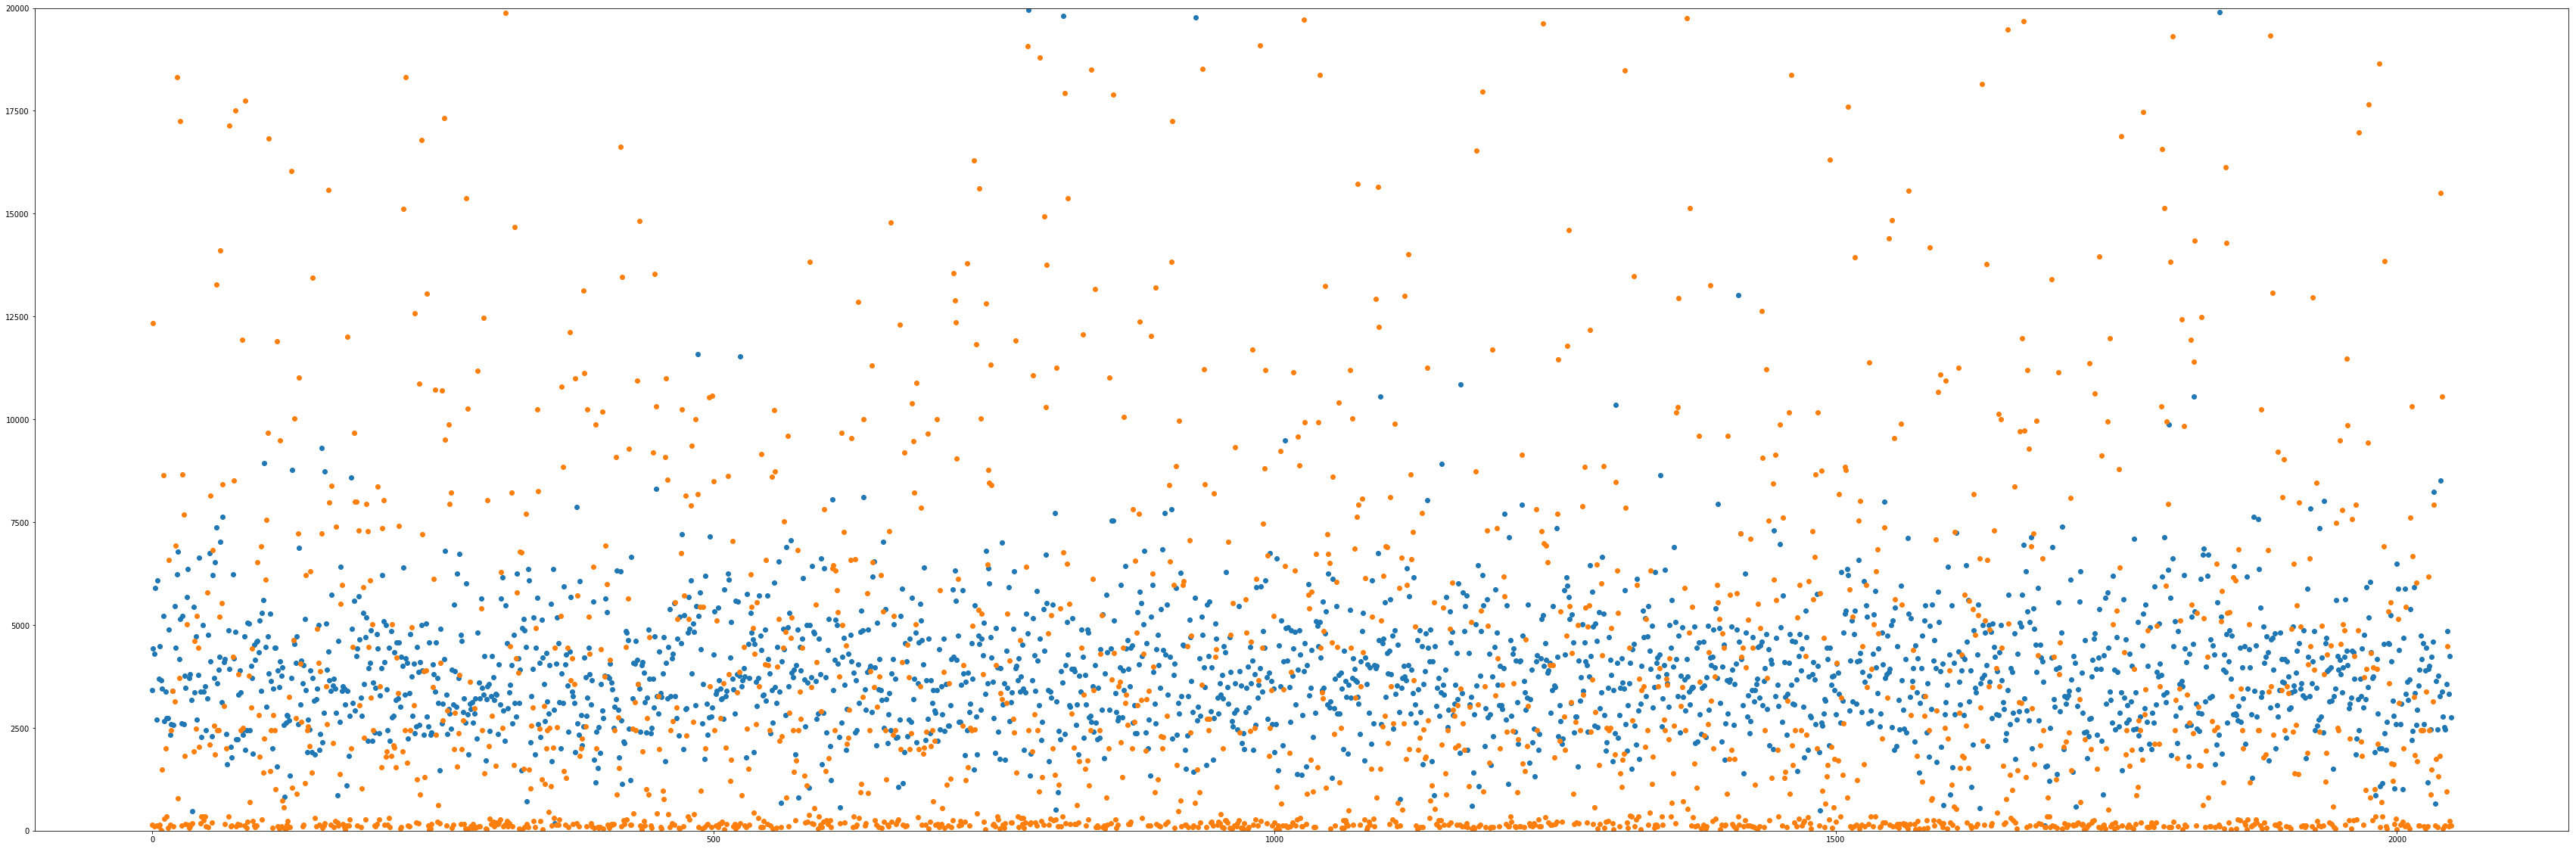

In [39]:
import matplotlib.pyplot as plt
x_ = np.arange(len(y_test))
#fig = plt.figure
plt.figure(num='Comparison',figsize=(60,20))
plt.ylim((0, 20000))
#fig.set_size_inches(20,200)
plt.scatter(x_, result)  
plt.scatter(x_, y_test)  
plt.show()